## <span style="color:blue"> Ex 1 - Stefano Schmidt </span>

### Exercise 1.1
The Pseudo-Random Number generator is tested in the first part of ex_1.cpp.
It produces an output file __integral.dat__ with three colums holding **N | I | sigma_I**
Here N is the number of blocks used for computation; I is the average over of the value of the integral and sigma_I its uncertainty computed with blocking method by the procedure `compute_statistical_error` (defined in **useful_functions.cpp**).<br>
All the outputs have been produced with a constant number of data in each block $L=50$; from this follows that increasing the number of blocks, is incrased the number of random number sampled $M=N*L$. The maximum number of M here is $M_{max}=10^6$. <br>
The following python script is useful to plot the result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

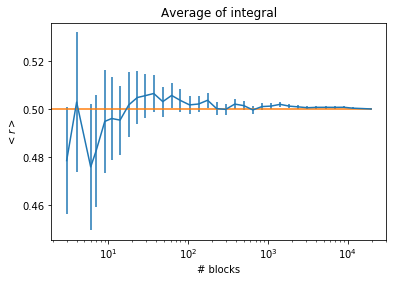

In [2]:
data_avg = np.loadtxt('integral.dat', dtype=float)

plt.title("Average of integral")
plt.xlabel("# blocks")
plt.ylabel("$<r>$")
plt.xscale("log")
plt.errorbar(data_avg[:,0],data_avg[:,1], xerr=None, yerr=data_avg[:,2])
plt.plot([0,data_avg[-1,0]],[0.5,0.5])
plt.show()

The same is done to compute the variance of the integral (i.e. the integral $\int_0^1 (r-1/2)^2 dr = 1/12$).
The output is read from file __variance.dat__ and plotted in the same fashion as above.

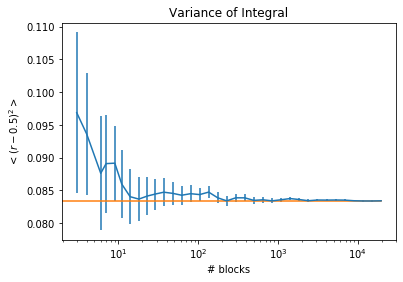

In [3]:
data_var = np.loadtxt('variances.dat', dtype=float)

plt.title("Variance of Integral")
plt.xlabel("# blocks")
plt.ylabel('$<(r-0.5)^2>$')
plt.xscale("log")
plt.errorbar(data_var[:,0],data_var[:,1], xerr=None, yerr=data_var[:,2])
plt.plot([0,data_var[-1,0]],[1/12,1/12])
plt.show()

The chi squared test is performed in the code. It save the histogram of the $\chi^2_i$ in the file **chi.dat**. The histogram contains $N= 10^7$ data and $N_{bins} = 100$ bins.<br>
The plot is done with the following code which computes also the total chi-squared. <br>
Since the computed $\chi^2$ is around the expected value of 100 (= number of bins) the generators works well.

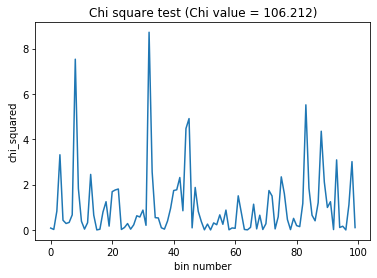

In [4]:
data_chi = np.loadtxt('chi.dat', dtype=float)
chi_squared = np.sum(data_chi, axis =0)

plt.title("Chi square test (Chi value = "+str(np.round(chi_squared[1],3))+")")
plt.xlabel("bin number")
plt.ylabel('chi_squared')
plt.plot(data_chi[:,0],data_chi[:,1])
plt.show()

### Exercise 1.2
Exponential distribution and Cauchy-Lorentz distribution has been added to the generator. Their definition can be found in file ../general_code/random.cpp.
Their prototypes are: <br>
&emsp;   `double Random :: Cauchy_Lorentz(double mu, double Gamma)` <br>
&emsp;   `double Random :: Exponential(double lambda)`<br>
The two functions have been used to produce the required output in 3 files: **standard.dat**, **exp.dat**, **C_L.dat**.<br>
Every column of the file holds $10^4$ realizations of the random variable $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ for different values of N ={1,2,10,100}. <br>
The plots are done with the following code and for each histogram it is plotted the dsitribution toward which should converge $S_N$ for large $N$.

In [5]:
import scipy.stats as stats
N_list = [1,2,10,100]

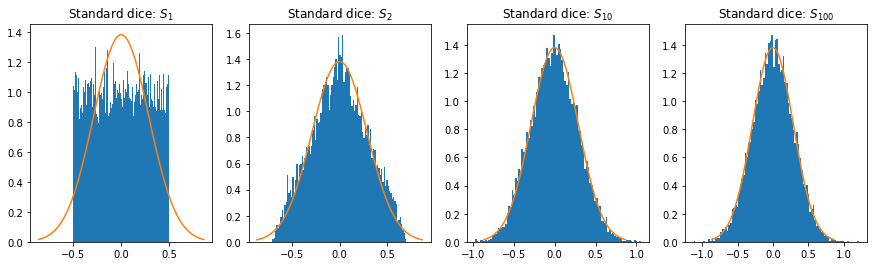

In [6]:
standard_dice = np.loadtxt("standard.dat")
mu=0.5
sigma = 1./np.sqrt(12)
x = np.linspace(- 3*sigma, 3*sigma, 100)


plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.title("Standard dice: $S_{"+str(N_list[i])+"}$")
    plt.hist(np.sqrt(N_list[i])*(standard_dice[:,i]-mu),bins=100, density =True)
    plt.plot(x, stats.norm.pdf(x,0, sigma))    

plt.show()

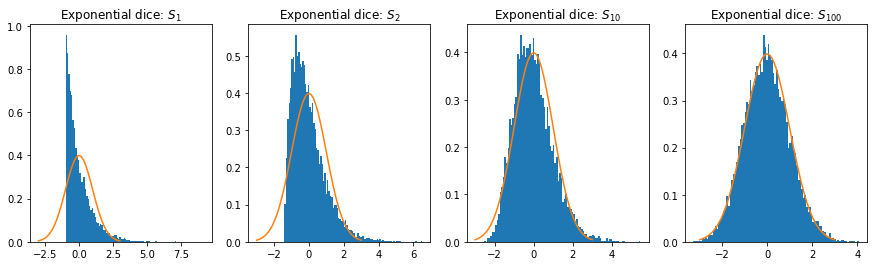

In [7]:
exp_dice = np.loadtxt("exp.dat")
rate = 1
x = np.linspace(-3*rate, 3*rate, 100)


plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.title("Exponential dice: $S_{"+str(N_list[i])+"}$")
    plt.hist(np.sqrt(N_list[i])*(exp_dice[:,i]-rate),bins=100, density =True)
    plt.plot(x, stats.norm.pdf(x,0, 1./rate))

plt.show()

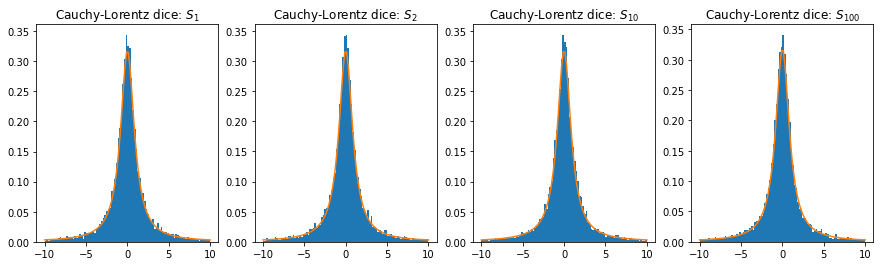

In [8]:
CL_dice = np.loadtxt("C_L.dat")
mu = 0
gamma = 1
l_range = 20
x = np.linspace(-l_range/2, l_range/2, 100)


plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.title("Cauchy-Lorentz dice: $S_{"+str(N_list[i])+"}$")
    plt.hist(CL_dice[:,i],bins=100, density =True, range=(-l_range/2,l_range/2))
    plt.plot(x, stats.cauchy.pdf(x,0, gamma))

plt.show()

As expected for the two distributions with $S_N$ converging to a gaussian distribution in the limit $N \rightarrow \infty$, we notice that the agreement improves with increasing N. For the Cauchy-Lorentz distribution things are different: since $S_N$ is still a CL distribution, for every N there is an extact CL distribution.<br>
It is worth to be noticed that, since CL ha infinite variance, to represent it a cut-off on the x-axis is required: the reason is that also the bin far from the center have a non-zero counting. This is not the case for finite variance distributions for which a cut-off is naturally provided by the sampling.

### Exercise 1.3
In order to simulate Buffon's experiment we proceed as follows.<br>
- We set a number $N_{experiments}$ of experiments to perform. Each experiment consist in throwing a needle for a number M of times.
- Given an experiment we get a value of $\pi$ with its uncertainty using datablock with a fixed $N_{blocks}$
- We repeat the experiment many times for different values of M (#of throws for each experiment)<br>
- We then plot the value of $\pi$ with error bars compared with the number M of data used. The data are produced by the c++ program in the file **buffon.dat**. <br>

In this simulation it has been set $N_{experiments} = 5000$ and $N_{blocks} = 100$.

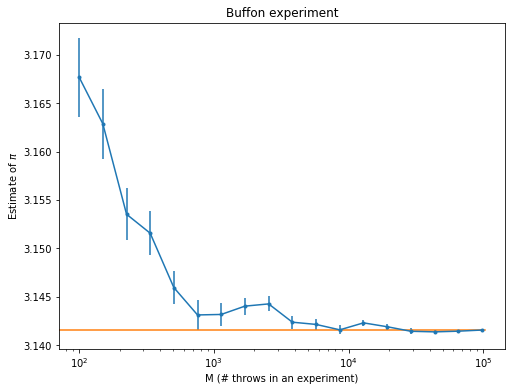

In [9]:
buffon_data = np.loadtxt("buffon.dat", dtype=float)

plt.figure(figsize=(8, 6))
plt.title("Buffon experiment")
plt.xlabel("M (# throws in an experiment)")
plt.ylabel("Estimate of $\pi$")
plt.xscale("log")
plt.errorbar(buffon_data[:,0],buffon_data[:,1], xerr=None, yerr=buffon_data[:,2],fmt=".-")
plt.plot([0,buffon_data[-1,0]*1.05], [3.1415926535]*2)
plt.show()

The Buffon algorith is able to compute the value of $\pi$. To have an accurate value at least $10^4$ trhows are required: quite infeasible for an actual needle throw!!